### 备注

#（1）【目的】：《阿里天池大赛_资金流入流出预测数据集》数据分析，对dataset进行探索性分析
#（2）【Author】：shasha.mao
#（3）【日期】：2021/03/01
#（4）【数据】：
#（5）【路径】：.\data\dateset.xlsx
#（6）【备注】：
#（7）【更改】：初版 2020/02/27

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import util
import json
import os
import sys
import tqdm
import time
from datetime import datetime

%matplotlib inline
sns.set()

In [2]:
print(datetime.now())
start = time.time()

2021-03-02 13:16:14.527363


### 数据导入

In [7]:
df = pd.read_excel(r".\data\dateset.xlsx").set_index('date')
df.head()

,report_date,year,month,day,holiday_detail,Interest_O_N,Interest_1_W,Interest_2_W,Interest_1_M,Interest_3_M,...,total_redeem_amt,consume_amt,transfer_amt,tftobal_amt,tftocard_amt,share_amt,category1,category2,category3,category4
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,20130701,2013,7,1,0,4.456,5.423,6.040,6.8800,5.295,...,5525022,382160,5142862,5142862,0,29562,0,89350,0,292810
2013-07-02,20130702,2013,7,2,0,3.786,4.750,5.074,5.8000,5.211,...,2554548,350066,2204482,2204482,0,29880,0,1650,0,348416
2013-07-03,20130703,2013,7,3,0,3.400,4.242,4.658,5.2000,5.148,...,5953867,454406,5499461,5499461,0,36614,0,69764,0,384642
2013-07-04,20130704,2013,7,4,0,3.348,3.938,4.464,5.1020,5.029,...,6410729,535391,5875338,5875338,0,38955,25078,107500,0,402813
2013-07-05,20130705,2013,7,5,0,3.380,3.816,4.295,4.7885,4.939,...,2763587,697926,2065661,2065661,0,40758,0,51100,0,646826


In [8]:
df.dtypes

report_date              int64
year                     int64
month                    int64
day                      int64
holiday_detail           int64
Interest_O_N           float64
Interest_1_W           float64
Interest_2_W           float64
Interest_1_M           float64
Interest_3_M           float64
Interest_6_M           float64
Interest_9_M           float64
Interest_1_Y           float64
mfd_daily_yield        float64
mfd_7daily_yield       float64
tBalance               float64
yBalance               float64
total_purchase_amt       int64
direct_purchase_amt      int64
purchase_bal_amt         int64
purchase_bank_amt        int64
total_redeem_amt         int64
consume_amt              int64
transfer_amt             int64
tftobal_amt              int64
tftocard_amt             int64
share_amt                int64
category1                int64
category2                int64
category3                int64
category4                int64
dtype: object

### 数据导入

#### 查看关键字段变化趋势 

#关键字段total_purchase_amt
#关键字段total_redeem_amt

Text(0,0.5,'amount')

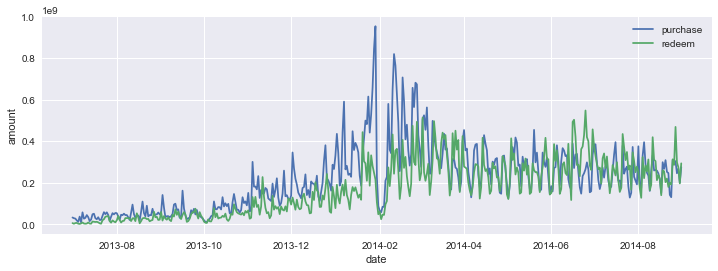

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df.total_purchase_amt, label="purchase")
plt.plot(df.total_redeem_amt, label="redeem")
plt.legend()
plt.xlabel("date")
plt.ylabel("amount")

#### 查看各变量之间的相关性 

In [23]:
df.shape

(427, 31)

In [25]:
df.corr?

In [29]:
pd.DataFrame(df.corr(), columns=["total_purchase_amt", "total_redeem_amt"])

,total_purchase_amt,total_redeem_amt
report_date,0.672631,0.789191
year,0.677642,0.781775
month,-0.583729,-0.482600
day,0.023047,0.125714
holiday_detail,-0.319803,-0.305132
Interest_O_N,0.225873,0.136656
Interest_1_W,0.275880,0.179569
Interest_2_W,0.287534,0.187004
Interest_1_M,0.312454,0.207123
Interest_3_M,0.396722,0.345268


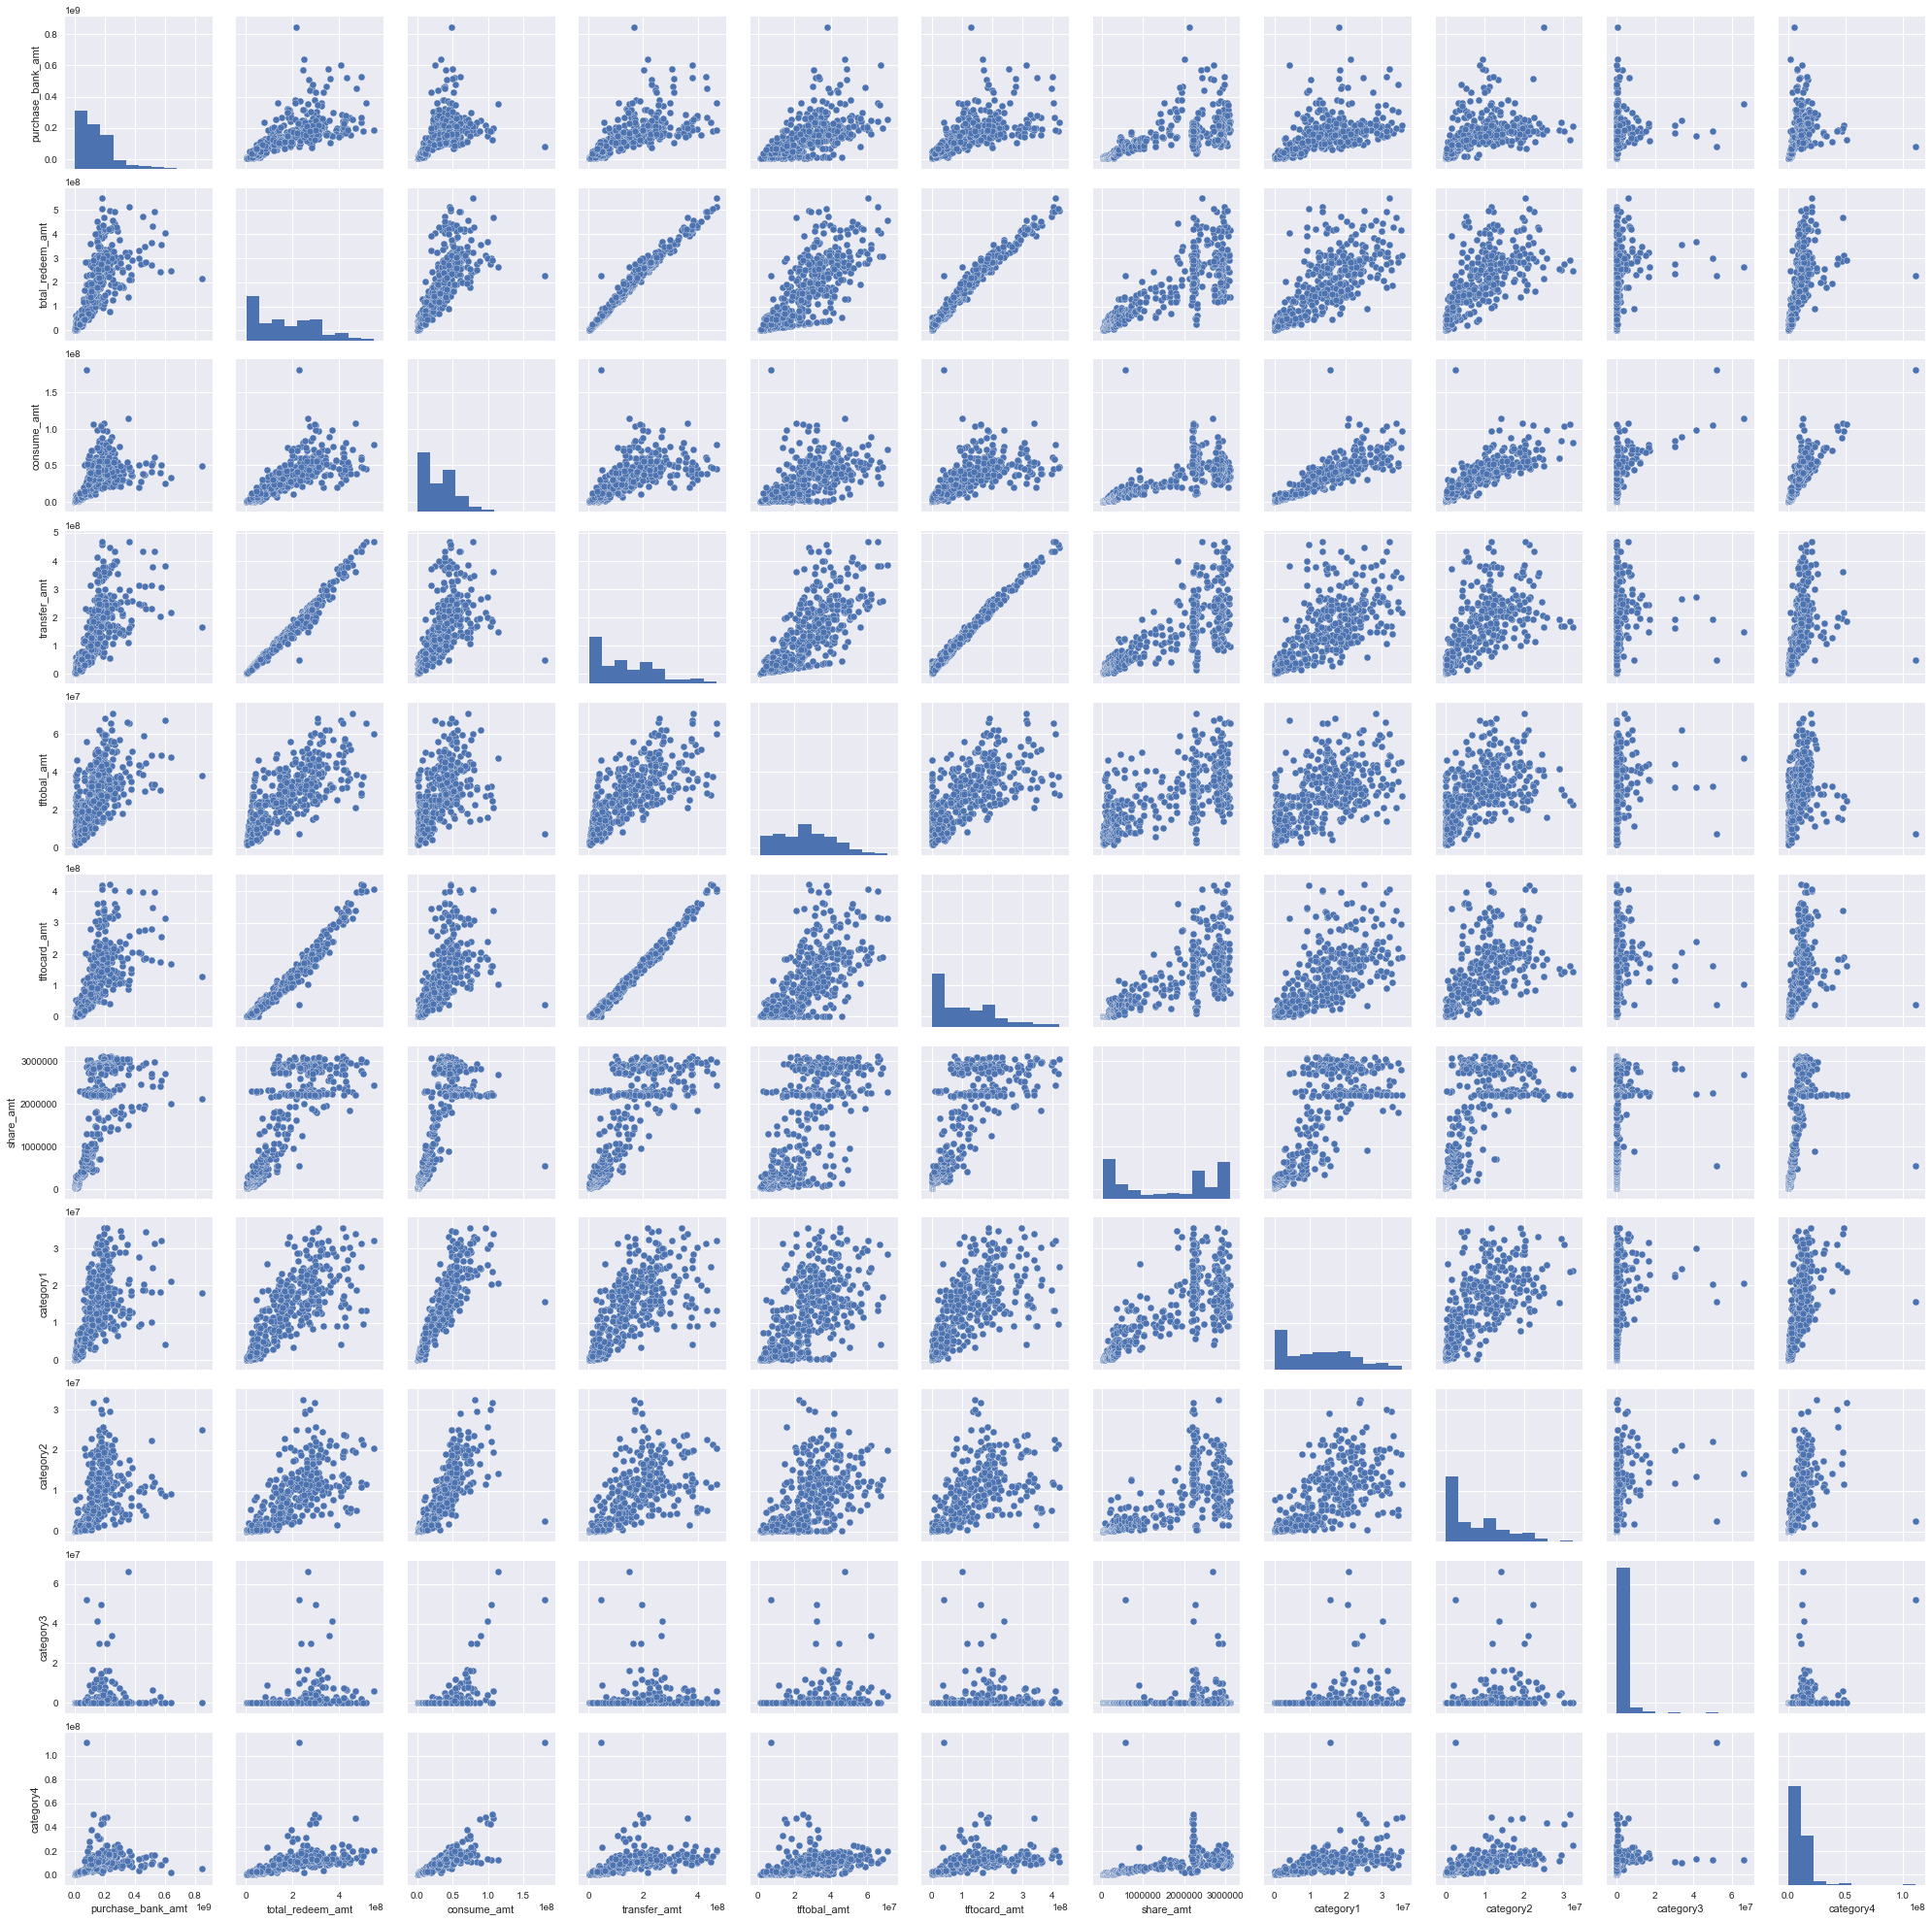

In [21]:
# sns.pairplot(df.iloc[:, 20:])
# plt.savefig(r"pairplot.png", dpi=400)

In [5]:
print("本次运行总共耗时%.1f秒" % (time.time() - start))

本次运行总共耗时0.3秒
